# SMOTE 

In [3]:
import numpy as np
from collections import Counter

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv("../data/imbalanced_preprocessed_1.csv")


In [5]:
# Encode categorical target variable
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

In [6]:




# Separate features and target variable
X = df[['dynamics_rms_mean', 'dynamics_rms_std',
       'pitch_pitch_mean', 'rhythm_attacktime_mean',
       'rhythm_eventdensity_mean', 'rhythm_fluctuationmax_peakposmean',
       'rhythm_pulseclarity_mean', 'rhythm_tempo_mean', 'rhythm_tempo_std',
       'spectral_brightness_mean', 'spectral_brightness_std',
       'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_flatness_mean', 'spectral_flatness_std',
       'spectral_inharmonicity_mean', 'spectral_irregularity_mean',
       'spectral_kurtosis_mean', 'spectral_kurtosis_std',
       'spectral_mfcc_mean_1', 'spectral_mfcc_mean_10',
       'spectral_mfcc_mean_11', 'spectral_mfcc_mean_12',
       'spectral_mfcc_mean_13', 'spectral_mfcc_mean_2', 'spectral_mfcc_mean_3',
       'spectral_mfcc_mean_4', 'spectral_mfcc_mean_5', 'spectral_mfcc_mean_6',
       'spectral_mfcc_mean_7', 'spectral_mfcc_mean_8', 'spectral_mfcc_mean_9',
       'spectral_mfcc_std_1', 'spectral_mfcc_std_10', 'spectral_mfcc_std_11',
       'spectral_mfcc_std_12', 'spectral_mfcc_std_13', 'spectral_mfcc_std_2',
       'spectral_mfcc_std_3', 'spectral_mfcc_std_4', 'spectral_mfcc_std_5',
       'spectral_mfcc_std_6', 'spectral_mfcc_std_7', 'spectral_mfcc_std_8',
       'spectral_mfcc_std_9', 'spectral_novelty_mean', 'spectral_novelty_std',
       'spectral_rolloff85_mean', 'spectral_rolloff85_std',
       'spectral_rolloff95_mean', 'spectral_rolloff95_std',
       'spectral_roughness_mean', 'spectral_skewness_mean',
       'spectral_skewness_std', 'spectral_spectentropy_mean',
       'spectral_spectentropy_std', 'spectral_spread_mean',
       'spectral_spread_std', 'timbre_lowenergy_mean', 'timbre_lowenergy_std',
       'timbre_spectralflux_mean', 'timbre_spectralflux_std',
       'tonal_hcdf_mean', 'tonal_hcdf_std', 'tonal_keyclarity_mean',
       'tonal_keyclarity_std', 'tonal_mode_mean', 'tonal_mode_std']]  # Feature columns
y = df['Category_encoded']       # Encoded target column



In [7]:
# Apply SMOTE to oversample minority classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [8]:
# Decode target variable back to original labels
y_resampled = label_encoder.inverse_transform(y_resampled)



In [9]:
# Create a balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=['Arousal', 'Valence'])
df_balanced['Category'] = y_resampled

# Display class distribution after oversampling
print(df_balanced['Category'].value_counts())

Category
Class 4    182
Class 1    182
Class 3    182
Class 2    182
Name: count, dtype: int64


In [10]:
print(df['Category'].value_counts())


Category
Class 4    182
Class 2    173
Class 3     83
Class 1     42
Name: count, dtype: int64


In [11]:
df_balanced.to_csv("../data/balanced_preprocessed_1.csv" , index = False)

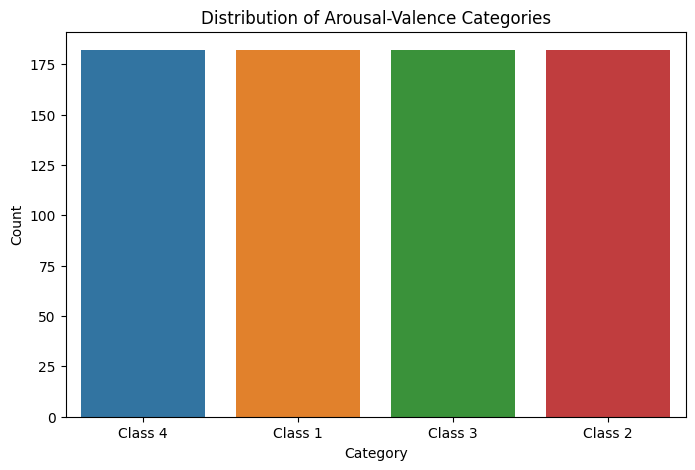

In [12]:


# Count the occurrences of each category
category_counts = df_balanced['Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values , hue= category_counts.index)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Arousal-Valence Categories')

# Show the plot
plt.show()